In [1]:
from microsim import schema as ms
from microsim.util import ortho_plot

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(256, 512, 512), scale=(0.02, 0.01, 0.01)),
    output_space={"downscale": 8},
    sample=ms.Sample(labels=[ms.MatsLines(density=1, length=8, azimuth=10, max_r=0.9)]),
    modality=ms.Confocal(pinhole_au=0.4),
    detector=ms.CameraCCD(
        qe=0.82, full_well=18000, read_noise=6, bit_depth=12, offset=100
    ),
    settings=ms.Settings(random_seed=100),
    output_path="au1.tif",
)

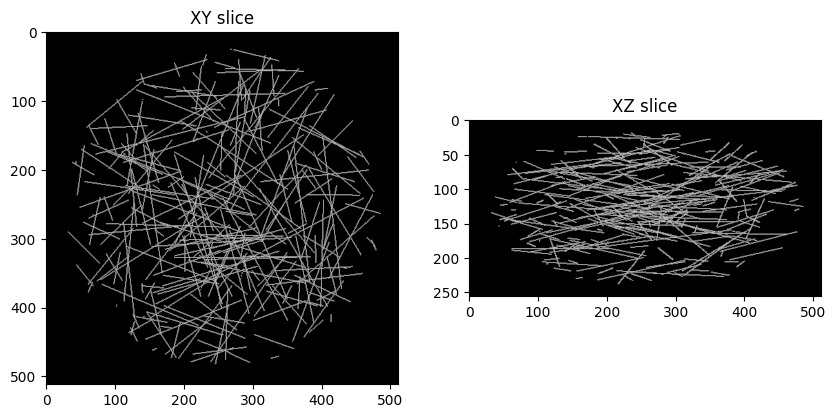

In [2]:
ground_truth = sim.ground_truth()
ortho_plot(ground_truth, mip=True)

convolving em_psf with pinhole...: 100%|██████████| 256/256 [00:01<00:00, 142.73it/s]


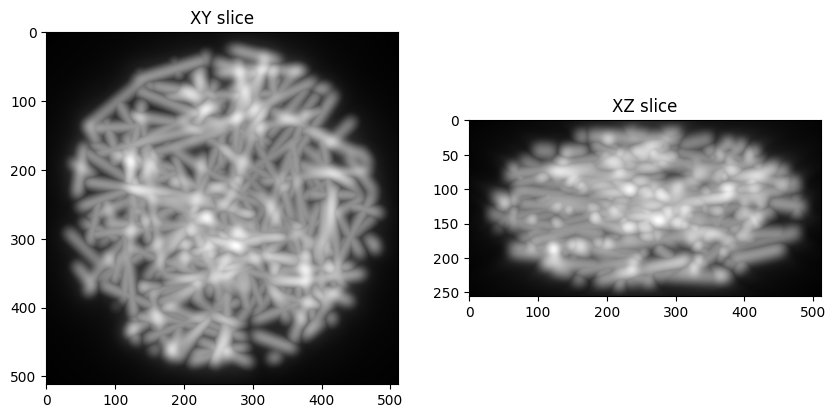

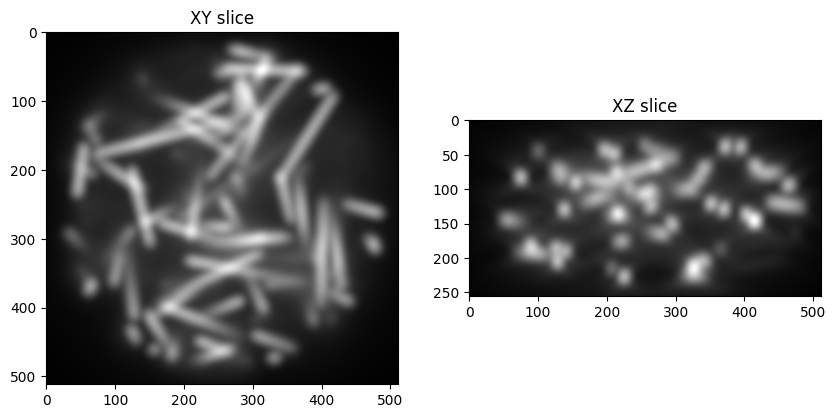

In [4]:
emission_flux = sim.emission_flux(ground_truth)
optical_img = sim.optical_image(emission_flux)
ortho_plot(optical_img, mip=True)
ortho_plot(optical_img, mip=False)

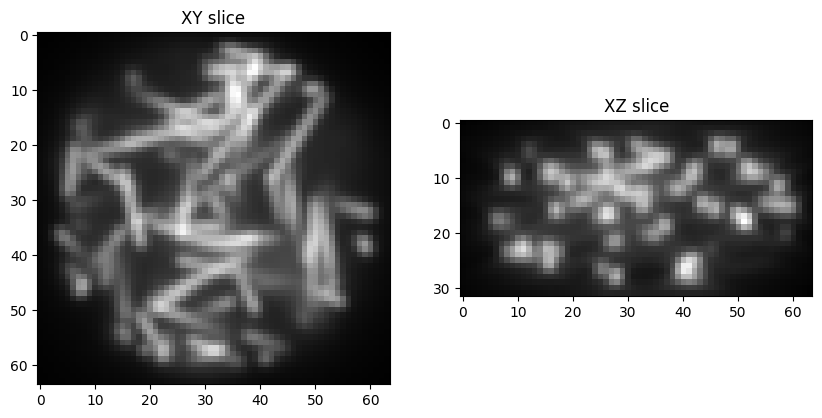

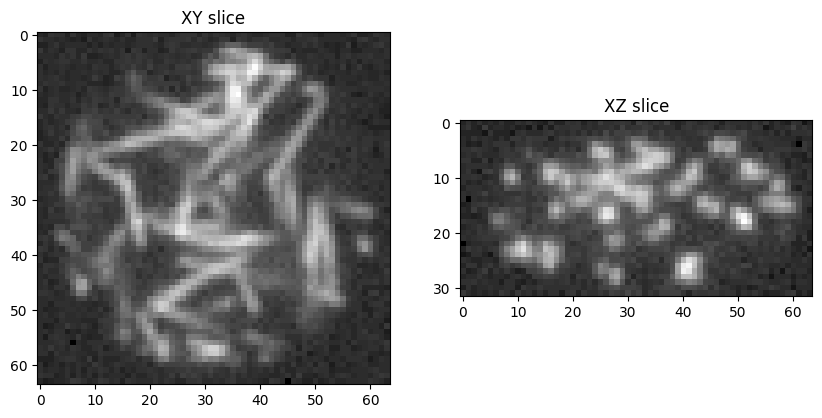

In [5]:
noise_free_digital_image = sim.digital_image(optical_img, with_detector_noise=False)
ortho_plot(noise_free_digital_image, mip=False)

realistic_digital_image = sim.digital_image(optical_img, with_detector_noise=True)
ortho_plot(realistic_digital_image, mip=False)

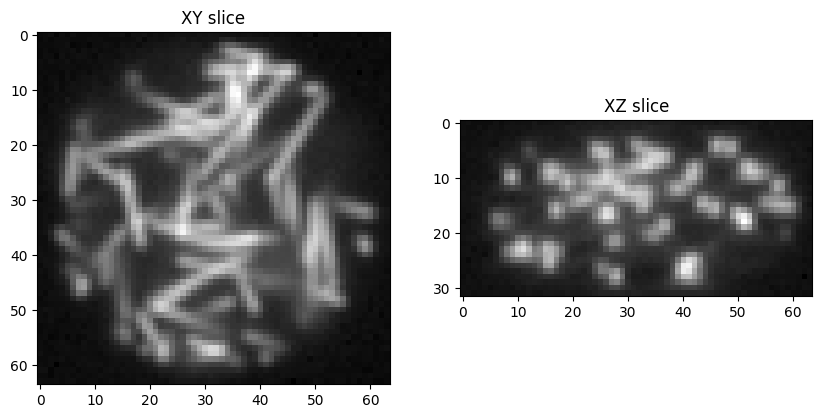

In [6]:
# brighter sample
realistic_digital_image2 = sim.digital_image(optical_img, photons_pp_ps_max=1e5)
ortho_plot(realistic_digital_image2, mip=False)